In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder

# from sklearn.metrics import precision_score, recall_score, f1_score
# import statsmodels.api as sm


import seaborn as sn
from matplotlib import pyplot as plt


In [14]:
df = pd.read_csv('new_data3.csv')

In [15]:
df.columns

Index(['Insured', 'Motive', 'Gender', 'Age range', 'Occupation',
       'Education level', 'Social Class', 'Area of Residence',
       'Number of Adults', 'Number of Children', 'Income Range',
       'Time of Cover', 'Number of Insurers', 'Premium', 'Method of Payment',
       'Loss or Damage', 'Claim', 'Ability to Recover',
       'Borrow money or sell assets to cover loss',
       'Claim help to avoid debt or financial hardship',
       'Claim help maintain income or business', 'Post claim capital range',
       'Claim challenge', 'Claim challenge reason', 'Premium Change',
       'Cost of Insurance ability to maintain payment',
       'Effects of changes in premium on income or business'],
      dtype='object')

**RESTRUCTURE Post claim capital range**

In [16]:
# replace values
df['Post claim capital range'] = df['Post claim capital range'].replace({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1})

In [17]:
# save updated data as CSV file
df.to_csv('new_data5.csv', index=False)

In [18]:
df = pd.read_csv('new_data5.csv')

In [19]:
df.describe()

,Insured,Motive,Gender,Age range,Occupation,Education level,Social Class,Area of Residence,Number of Adults,Number of Children,...,Ability to Recover,Borrow money or sell assets to cover loss,Claim help to avoid debt or financial hardship,Claim help maintain income or business,Post claim capital range,Claim challenge,Claim challenge reason,Premium Change,Cost of Insurance ability to maintain payment,Effects of changes in premium on income or business
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,9.000000,12.000000,12.000000,12.000000,82.000000,15.000000,5.00000,82.000000,82.000000,82.000000
mean,0.195122,0.914634,0.548780,0.353659,0.390244,2.878049,1.353659,0.487805,1.500000,1.158537,...,0.444444,1.416667,0.250000,0.416667,0.524390,0.600000,1.20000,0.768293,1.048780,1.560976
std,0.398733,1.102200,0.500677,0.759661,0.490807,0.691933,1.179788,0.502927,1.188941,1.241957,...,0.527046,0.900337,0.452267,0.514929,0.502478,0.507093,1.30384,0.424519,1.350834,1.905791
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.500000,1.000000
75%,0.000000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,3.000000,2.000000,...,1.000000,2.000000,0.250000,1.000000,1.000000,1.000000,2.00000,1.000000,2.000000,3.000000
max,1.000000,3.000000,1.000000,3.000000,1.000000,4.000000,3.000000,1.000000,3.000000,3.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.00000,1.000000,4.000000,5.000000


## USING LOGISTIC REGRESSION

In [20]:
X = df.loc[:, ['Motive','Income Range','Gender','Education level','Number of Children','Time of Cover','Premium','Claim','Insured']]
y = df['Post claim capital range']

In [21]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X,y, test_size = 0.3)

**FIT THE WHOLE MODEL**

In [22]:
# fit encoder on X_train
# from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_all_train)

# transform X_train and X_test into encoded matrices
X_all_train_encoded = encoder.transform(X_all_train)
X_all_test_encoded = encoder.transform(X_all_test)

In [23]:
# create the logistic regression model
logreg = LogisticRegression(random_state=50, multi_class='multinomial', solver='lbfgs',max_iter = 10000)
# logreg = LogisticRegression(random_state=50)

# fit the logistic regression model to the training data
# fit the model
logreg.fit(X_all_train_encoded, y_all_train)

# predict on the test set
y_train_pred = logreg.predict(X_all_train_encoded)
y_test_pred = logreg.predict(X_all_test_encoded)

In [24]:
# evaluate the model
score = logreg.score(X_all_test_encoded, y_all_test)

cmr = confusion_matrix(y_all_test, y_test_pred)
print('Accuracy:', score)


Accuracy: 0.96


In [47]:
# import numpy as np
# X_train_encoded2 = X_all_train_encoded.toarray()
# y_train = np.array(y_all_train)

# logit_model = sm.MNLogit(y_train, X_train_encoded2)
# result2 = logit_model.fit(maxiter=10000)
# print(result2.summary())

In [25]:
# Identify significant variables
# sig_vars2 = pd.DataFrame(result2.pvalues[result2.pvalues < 0.05]).index
# print("Significant variables:", sig_vars2)

**SPLITTING THE MODEL**

In [26]:
# X1 = df.loc[:, ['Motive','Income Range','Gender','Education level','Number of Children']]
# y1 = df['Insured']

X1_train = X_all_train.loc[:,['Motive','Income Range','Gender','Education level','Number of Children']]
y1_train = X_all_train['Insured']

X1_test = X_all_test.loc[:,['Motive','Income Range','Gender','Education level','Number of Children']]
y1_test = X_all_test['Insured']

In [27]:
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.3)


In [28]:
encoder2 = OneHotEncoder()
encoder2.fit(X1_train)

# transform X_train and X_test into encoded matrices
X1_train_encoded = encoder2.transform(X1_train)
X1_test_encoded = encoder2.transform(X1_test)

In [29]:
# create the logistic regression model
logreg2 = LogisticRegression(random_state=50)

# fit the logistic regression model to the training data
# fit the model
logreg2.fit(X1_train_encoded, y1_train)

# predict on the test set
y1_train_pred = logreg2.predict(X1_train_encoded)
y1_test_pred = logreg2.predict(X1_test_encoded)

In [30]:
score = logreg2.score(X1_test_encoded, y1_test)

cmr = confusion_matrix(y1_test, y1_test_pred)
print('Accuracy:', score)

Accuracy: 0.8


In [ ]:
# X2 = df.loc[:,['Time of Cover','Premium','Claim']]
# y2 = df['Post claim capital range']

X2_t = X_all_train.loc[:,['Time of Cover','Premium','Claim']]
X2_train = pd.DataFrame(np.hstack((X2_t.to_numpy(), y1_train_pred.reshape(-1, 1))))

X2_te  = X_all_test.loc[:,['Time of Cover','Premium','Claim']]
X2_test = pd.DataFrame(np.hstack((X2_te.to_numpy(), y1_test_pred.reshape(-1, 1))))

In [ ]:
# X2_t, X2_te, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3)

In [ ]:
# X2_train = pd.DataFrame(np.hstack((X2_t.to_numpy(), y1_train_pred.reshape(-1, 1))))
# X2_test = pd.DataFrame(np.hstack((X2_te.to_numpy(), y1_test_pred.reshape(-1, 1))))

encoder3 = OneHotEncoder()
encoder3.fit(X2_train)

# transform X_train and X_test into encoded matrices
X2_train_encoded = encoder3.transform(X2_train)
X2_test_encoded = encoder3.transform(X2_test)

In [ ]:
# fit the model
# logreg2 = LogisticRegression(random_state=50, multi_class='multinomial', solver='lbfgs')

logreg3 = LogisticRegression(random_state=50)
logreg3.fit(X2_train_encoded, y_all_train)

LogisticRegression(random_state=50)

In [ ]:
# predict on the test set

y2_pred = logreg3.predict(X2_test_encoded)
# evaluate the model

score = logreg3.score(X2_test_encoded, y_all_test)

cmr = confusion_matrix(y_all_test, y2_pred)
print('Accuracy:', score)


Accuracy: 0.5066666666666667


Text(33.22222222222222, 0.5, 'Predicted Value')

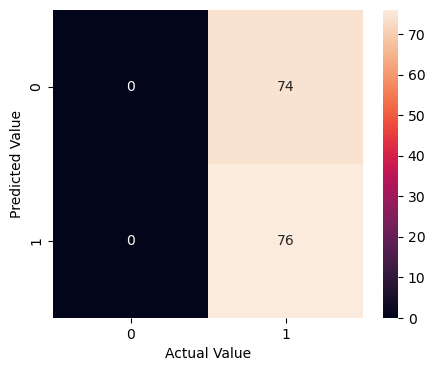

In [ ]:
plt.figure(figsize=(5,4))
sn.heatmap(cmr, annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [ ]:
import numpy as np
X_train_encoded2 = X2_train_encoded.toarray()
y_train = np.array(y_all_train)

logit_model = sm.MNLogit(y_train, X_train_encoded2)
result = logit_model.fit(maxiter=10000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.672050
         Iterations 78
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  350
Model:                        MNLogit   Df Residuals:                      342
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 May 2023   Pseudo R-squ.:                 0.01075
Time:                        12:29:50   Log-Likelihood:                -235.22
converged:                       True   LL-Null:                       -237.77
Covariance Type:            nonrobust   LLR p-value:                    0.6462
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3538        nan        nan        nan         nan         nan
x2            -0.0894       

c:\Users\Academic\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


In [ ]:
# Identify significant variables
sig_vars = pd.DataFrame(result.pvalues[result.pvalues < 0.05]).index
print("Significant variables:", sig_vars)

Significant variables: RangeIndex(start=0, stop=0, step=1)
